In [6]:
"""
Gráficas de mAP@0.5 y mAP@0.5:0.95 para tres modelos YOLO
con estilo “journal‑ready”.

Requisitos:
  pip install pandas matplotlib scienceplots
"""
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib as mpl
import scienceplots

mpl.rcdefaults()
plt.style.use(['science', 'no-latex', 'grid'])  # grid = cuadrícula suave

# 2.  Sobrescribe las fuentes para acentos ---------------------------
mpl.rcParams.update({
    "text.usetex": False,              # sin motor TeX
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],
    "mathtext.fontset": "dejavusans",  # misma fuente en mathtext
    "mathtext.default": "regular",
    "axes.unicode_minus": False,       # signo menos unicode
    # detalles visuales extra
    "figure.dpi": 300,
    "font.size": 10,
})


# scienceplots ha vuelto a poner mathtext.fontset='cm'.
# Vuelve a SOBRE-ESCRIBIR:
#mpl.rcParams["mathtext.fontset"] = "dejavusans"

# ------------------------------------------------------------------
# 1. Diccionario modelo → ruta CSV (ajusta rutas según tu estructura)
# ------------------------------------------------------------------
csv_paths = {
    "YOLOv11-n": Path("/Users/pepefv97/Downloads/PROYECTO_5/ENTRENAMIENTO_YOLOV11/YOLOV11_AdamW_lr0.001_wd1e-4_mos1.0/results.csv"),
    "YOLOv11-s": Path("/Users/pepefv97/Downloads/PROYECTO_5/ENTRENAMIENTO_YOLOV11S/YOLOV11S_AdamW_lr0.0005_wd0.0005_mos0/results.csv"),
    "YOLOv10-s": Path("/Users/pepefv97/Downloads/PROYECTO_5/ENTRENAMIENTO_YOLOV10S/YOLOV10S_AdamW_lr0.0005_wd0.0005_mos0/results.csv")
}

# ------------------------------------------------------------------
# 2. Cargar solo las columnas necesarias y agregar el nombre del modelo
# ------------------------------------------------------------------
frames = []
for label, path in csv_paths.items():
    df = pd.read_csv(
        path
    )
    df["model"] = label
    frames.append(df)

data = pd.concat(frames, ignore_index=True)




pro_palette = ["#3C5488",  
               "#E64B35",  
               "#00A087"]  

line_styles = ["-", "--", ":"]




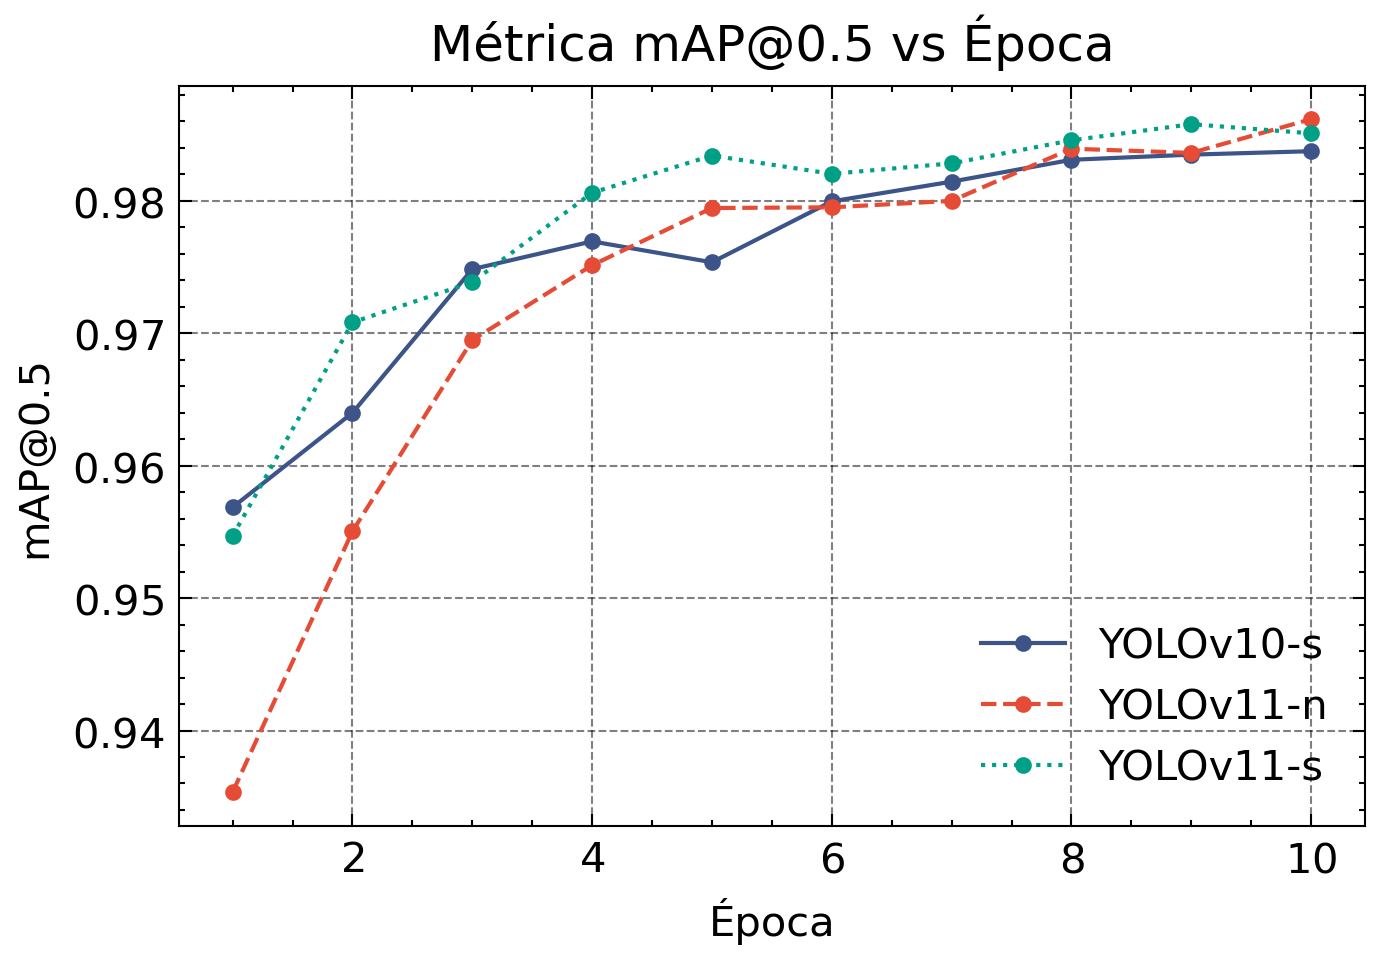

In [17]:
fig, ax = plt.subplots(figsize=(4.8, 3.4))
for i, (label, grp) in enumerate(data.groupby("model")):
        ax.plot(
            grp["epoch"],
            grp["metrics/mAP50(B)"],
            label=label,
            color=pro_palette[i % len(pro_palette)],
            linestyle=line_styles[i % len(line_styles)],
            marker='o',
            markersize=3
        )
ax.set_xlabel("Época")
ax.set_ylabel("mAP@0.5")
ax.set_title("Métrica mAP@0.5 vs Época", pad=6)
ax.legend(frameon=False)
fig.tight_layout()
plt.show() 

fig.savefig("map50_vs_epoca.png", dpi=300, bbox_inches="tight")

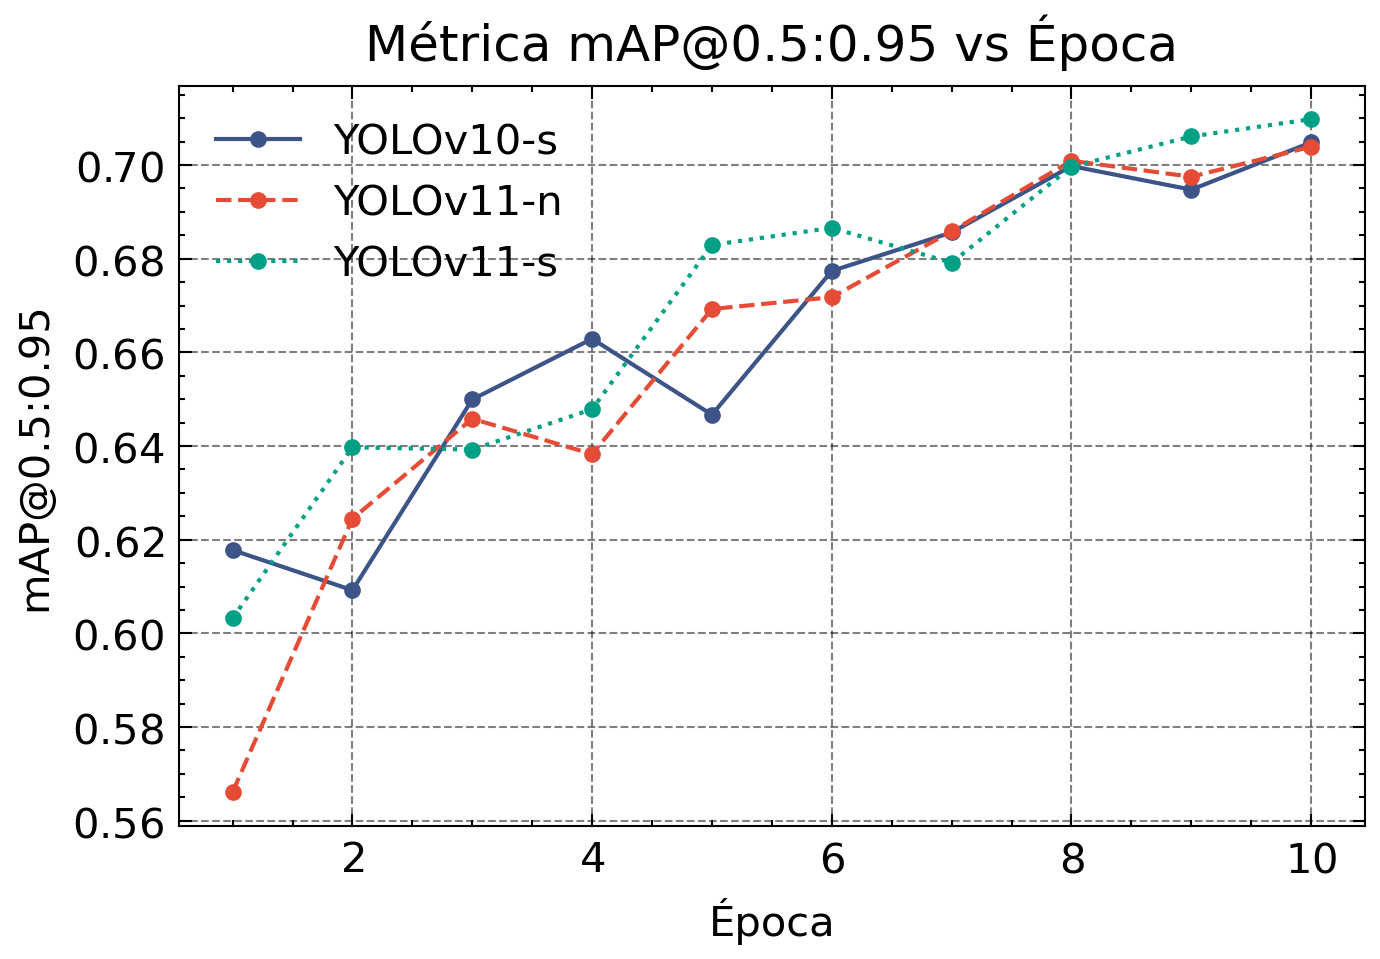

In [19]:
fig, ax = plt.subplots(figsize=(4.8, 3.4))
for i, (label, grp) in enumerate(data.groupby("model")):
        ax.plot(
            grp["epoch"],
            grp["metrics/mAP50-95(B)"],
            label=label,
            color=pro_palette[i % len(pro_palette)],
            linestyle=line_styles[i % len(line_styles)],
            marker='o',
            markersize=3
        )
ax.set_xlabel("Época")
ax.set_ylabel("mAP@0.5:0.95")
ax.set_title("Métrica mAP@0.5:0.95 vs Época", pad=6)
ax.legend(frameon=False)
fig.tight_layout()
plt.show() 

fig.savefig("map5095_vs_epoca.png", dpi=300, bbox_inches="tight")



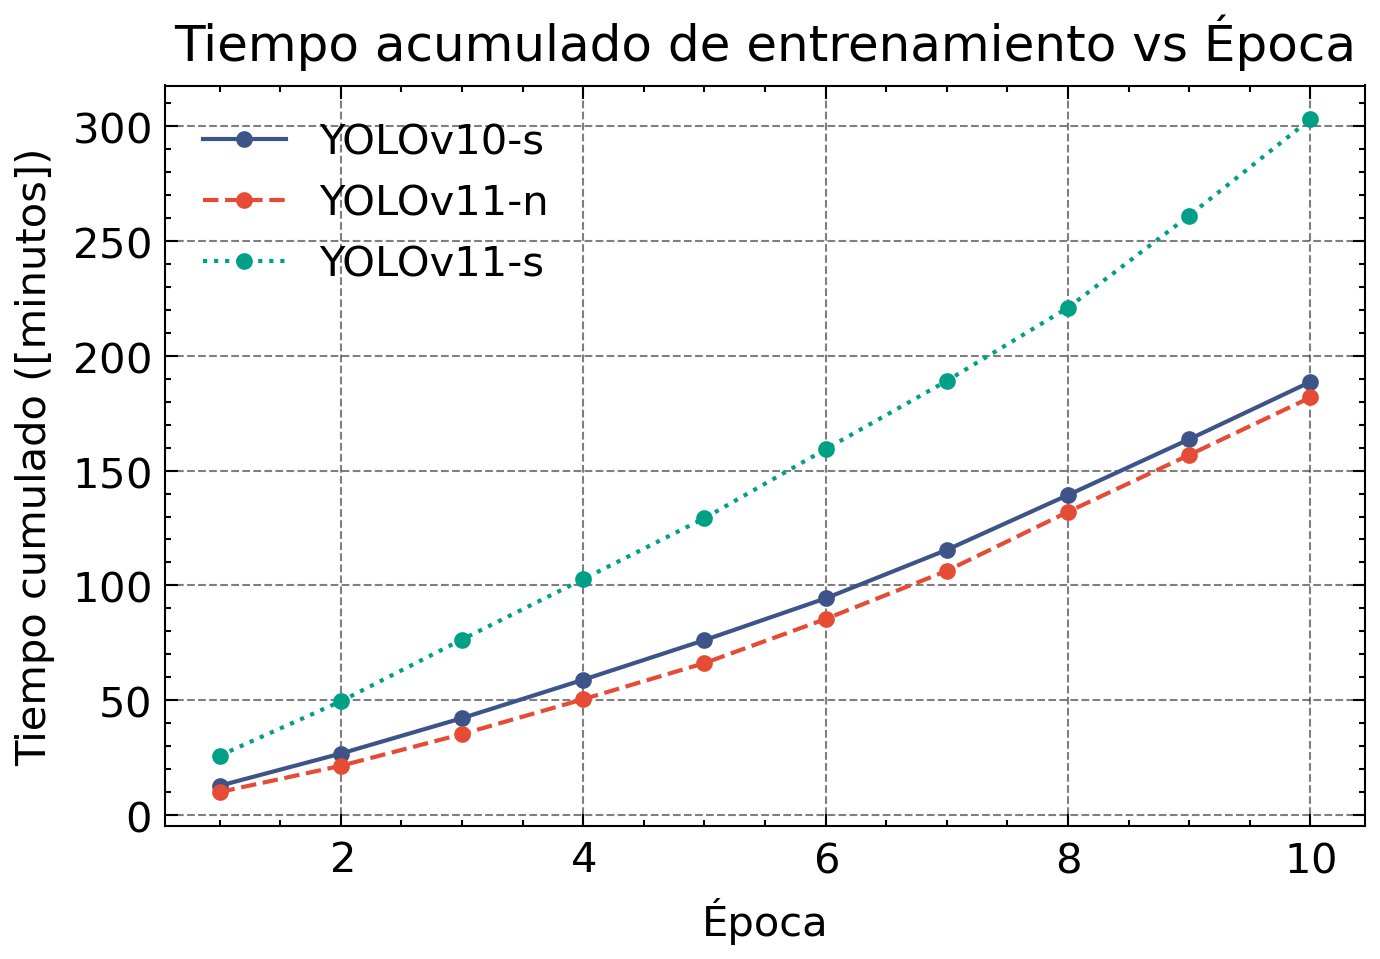

In [20]:
fig, ax = plt.subplots(figsize=(4.8, 3.4))
for i, (label, grp) in enumerate(data.groupby("model")):
        ax.plot(
            grp["epoch"],
            grp["time"]/60,
            label=label,
            color=pro_palette[i % len(pro_palette)],
            linestyle=line_styles[i % len(line_styles)],
            marker='o',
            markersize=3
        )
ax.set_xlabel("Época")
ax.set_ylabel("Tiempo cumulado ([minutos])")
ax.set_title("Tiempo acumulado de entrenamiento vs Época", pad=6)
ax.legend(frameon=False)
fig.tight_layout()
plt.show() 

fig.savefig("tiempo_vs_epoca.png", dpi=300, bbox_inches="tight")


In [12]:
# Columna de interés
col_map50 = "metrics/mAP50(B)"

# Índice de la fila con mAP@0.5 máximo dentro de cada modelo
idx_best_per_model = data.groupby("model")[col_map50].idxmax()

# Extraer esas tres filas y (opcional) ordenarlas por mAP@0.5 descendente
best_rows = (
    data.loc[idx_best_per_model]          # filas ganadoras
        .sort_values(col_map50, ascending=False)
        .reset_index(drop=True)
)

print(best_rows)


   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0     10  10913.4         0.96888         0.38839         1.05472   
1      9  15668.7         0.95032         0.37134         1.04583   
2     10  11321.0         1.89389         0.63711         2.07840   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.97622            0.96279           0.98617   
1               0.98386            0.95919           0.98579   
2               0.96698            0.96248           0.98375   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.70391       1.11659       0.42624       1.11211  0.000109   
1              0.70610       1.10802       0.40545       1.05876  0.000104   
2              0.70483       2.27962       0.73007       2.13490  0.000055   

     lr/pg1    lr/pg2      model  
0  0.000109  0.000109  YOLOv11-n  
1  0.000104  0.000104  YOLOv11-s  
2  0.000055  0.000055  YOLOv10-s  


In [9]:
data.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2', 'model'],
      dtype='object')

In [16]:
data[data["epoch"]==10]

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,model
9,10,10913.4,0.96888,0.38839,1.05472,0.97622,0.96279,0.98617,0.70391,1.11659,0.42624,1.11211,0.000109,0.000109,0.000109,YOLOv11-n
19,10,18188.9,0.92405,0.35344,1.03342,0.98034,0.96717,0.98510,0.70980,1.10529,0.39273,1.05375,0.000055,0.000055,0.000055,YOLOv11-s
29,10,11321.0,1.89389,0.63711,2.07840,0.96698,0.96248,0.98375,0.70483,2.27962,0.73007,2.13490,0.000055,0.000055,0.000055,YOLOv10-s
